# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaur
# Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range
ants.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv('zomato.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,9541,9542,9543,9544,9545,9546,9547,9548,9549,9550
Restaurant ID,6317637,6304287,6300002,6318506,6314302,18189371,6300781,6301290,6300010,6314987,...,5905215,5926979,5916085,5915547,5915054,5915730,5908749,5915807,5916112,5927402
Restaurant Name,Le Petit Souffle,Izakaya Kikufuji,Heat - Edsa Shangri-La,Ooma,Sambo Kojin,Din Tai Fung,Buffet 101,Vikings,Spiral - Sofitel Philippine Plaza Manila,Locavore,...,Emirgan Sí_tiô,Leman Kí_ltí_r,Dem Karakí_y,Karakí_y Gí_llí_oÛôlu,Baltazar,NamlÛ± Gurme,Ceviz AÛôacÛ±,Huqqa,Aôôk Kahve,Walter's Coffee Roastery
Country Code,162,162,162,162,162,162,162,162,162,162,...,208,208,208,208,208,208,208,208,208,208
City,Makati City,Makati City,Mandaluyong City,Mandaluyong City,Mandaluyong City,Mandaluyong City,Pasay City,Pasay City,Pasay City,Pasig City,...,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul,ÛÁstanbul
Address,"Third Floor, Century City Mall, Kalayaan Avenu...","Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Third Floor, Mega Fashion Hall, SM Megamall, O...","Third Floor, Mega Atrium, SM Megamall, Ortigas...","Ground Floor, Mega Fashion Hall, SM Megamall, ...","Building K, SM By The Bay, Sunset Boulevard, M...","Building B, By The Bay, Seaside Boulevard, Mal...","Plaza Level, Sofitel Philippine Plaza Manila, ...","Brixton Technology Center, 10 Brixton Street, ...",...,"Emirgan Mahallesi, SakÛ±p SabancÛ± Caddesi, No...","CaferaÛôa Mahallesi, Neôet í_mer Sokak, No 9/...","Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...","Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...","Kemankeô Karamustafa Paôa Mahallesi, KÛ±lÛ±í...","Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...","Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...","Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...","Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...","CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,..."
Locality,"Century City Mall, Poblacion, Makati City","Little Tokyo, Legaspi Village, Makati City","Edsa Shangri-La, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay City","Sofitel Philippine Plaza Manila, Pasay City",Kapitolyo,...,Emirgí¢n,KadÛ±kí_y Merkez,Karakí_y,Karakí_y,Karakí_y,Karakí_y,Koôuyolu,Kuruí_eôme,Kuruí_eôme,Moda
Locality Verbose,"Century City Mall, Poblacion, Makati City, Mak...","Little Tokyo, Legaspi Village, Makati City, Ma...","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM by the Bay, Mall of Asia Complex, Pasay Cit...","SM by the Bay, Mall of Asia Complex, Pasay Cit...","Sofitel Philippine Plaza Manila, Pasay City, P...","Kapitolyo, Pasig City",...,"Emirgí¢n, ÛÁstanbul","KadÛ±kí_y Merkez, ÛÁstanbul","Karakí_y, ÛÁstanbul","Karakí_y, ÛÁstanbul","Karakí_y, ÛÁstanbul","Karakí_y, ÛÁstanbul","Koôuyolu, ÛÁstanbul","Kuruí_eôme, ÛÁstanbul","Kuruí_eôme, ÛÁstanbul","Moda, ÛÁstanbul"
Longitude,121.027535,121.014101,121.056831,121.056475,121.057508,121.056314,120.979667,120.979333,120.98009,121.056532,...,29.05662,29.022805,28.978237,28.977636,28.981103,28.977392,29.041297,29.03464,29.036019,29.026016
Latitude,14.565443,14.553708,14.581404,14.585318,14.58445,14.583764,14.531333,14.54,14.55299,14.572041,...,41.104969,40.989705,41.024633,41.022904,41.025785,41.022793,41.009847,41.055817,41.057979,40.984776
Cuisines,"French, Japanese, Desserts",Japanese,"Seafood, Asian, Filipino, Indian","Japanese, Sushi","Japanese, Korean",Chinese,"Asian, European","Seafood, Filipino, Asian, European","European, Asian, Indian",Filipino,...,"Restaurant Cafe, Turkish, Desserts",Restaurant Cafe,Cafe,"Desserts, Bí_rek","Burger, Izgara",Turkish,"World C

In [4]:
# Dimension of dataset
print('Rows : {} Columns : {}'.format(df.shape[0],len(df.columns)))

Rows : 9551 Columns : 21


In [5]:
# Columns in dataset
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

'Average Cost for two' and 'Price range' is our target variable.

In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# datatype in dataset
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Float, Integer and Object datatypes are in the dataset

In [8]:
# null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

No null values in the dataset.

In [9]:
# Value counts in each columns
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('\n')

Restaurant ID
Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64


Restaurant Name
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


Country Code
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


City
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad        

In [10]:
# unique values in each column
for column in df.columns:
    print(column)
    print(df[column].unique())
    print('_'*80)
    print('\n')

Restaurant ID
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
________________________________________________________________________________


Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
________________________________________________________________________________


Country Code
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
________________________________________________________________________________


City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepbur

Average Cost for Two has 0 in some rows. Since it's our target variable so going to drop those rows. 

In [11]:
# checking rows where average cost for two is zero
df[df['Average Cost for two']==0]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
201,17330155,Deorio's,216,Columbus,"3201 Macon Rd Ste 167, Columbus, GA 31906",Columbus,"Columbus, Columbus",-84.942700,32.481000,"Italian, Pizza",...,Dollar($),No,No,No,No,1,4.0,Green,Very Good,170
240,17334679,Azteca,216,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.568300,41.569900,Mexican,...,Dollar($),No,No,No,No,1,4.3,Green,Very Good,167
277,17342548,Happy Joe's Pizza & Ice Cream,216,Dubuque,"855 Century Dr, Dubuque, IA 52002",Dubuque,"Dubuque, Dubuque",-90.726400,42.495500,"Desserts, Pizza, Ice Cream",...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,74
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
397,17582499,Royal Hotel,216,Pocatello,"11 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.012700,42.619200,"Pizza, Bar Food",...,Dollar($),No,No,No,No,1,3.6,Yellow,Good,59
407,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,...,Dollar($),No,No,No,No,1,3.6,Yellow,Good,108
634,3400073,The Latitude - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,103


In [12]:
# Rows in Longitude and Latitude having 0
print(df[df['Longitude']==0].shape[0])
print(df[df['Latitude']==0].shape[0])

498
498


In [13]:
# replacing rows value 0 in Average price for two, longitude and latitude column from np.nan
df['Average Cost for two'].replace(0,np.nan,inplace=True)
df['Longitude'].replace(0,np.nan,inplace=True)
df['Latitude'].replace(0,np.nan,inplace=True)

In [14]:
df.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude               498
Latitude                498
Cuisines                  9
Average Cost for two     18
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Switch to order menu      0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
dtype: int64

In [15]:
# Dropping null values
df.dropna(axis=0,inplace=True)

In [16]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
df.shape

(9030, 21)

In [18]:
# Dupliactes in dataset
df.duplicated().sum()

0

Dataset does not have any duplicate values.

In [19]:
# Number of unique values in each columns
df.nunique().to_frame('Number of unique values')

,Number of unique values
Restaurant ID,9030
Restaurant Name,7005
Country Code,15
City,140
Address,8447
Locality,1172
Locality Verbose,1225
Longitude,8097
Latitude,8654
Cuisines,1751


1) Restaurant ID is unique column and Switch to order menu has same value in all rows. So dropping these columns
2) Average cost for two has 138 unique values also cost in considered as continuous value and Price range has 4 unique values. which means we have one regression and one classification task. 

In [20]:
# Dropping restaurant ID
df.drop(columns={'Restaurant ID','Switch to order menu'},inplace=True)

In [21]:
df.shape

(9030, 19)

In [22]:
# Description of data
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9030.000000,9030.000000,9030.000000,9030.000000,9030.000000,9030.000000,9030.000000
mean,18.962791,67.901713,27.264298,1230.646955,1.818051,2.727409,164.052824
std,57.607482,39.163732,9.439614,16545.946300,0.909948,1.476309,440.900233
min,1.000000,-157.948486,-41.330428,7.000000,1.000000,0.000000,0.000000
25%,1.000000,77.093741,28.504881,250.000000,1.000000,2.600000,6.000000
50%,1.000000,77.201271,28.574524,400.000000,2.000000,3.200000,33.000000
75%,1.000000,77.286354,28.645340,700.000000,2.000000,3.700000,139.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Graphical Analysis
Univariate

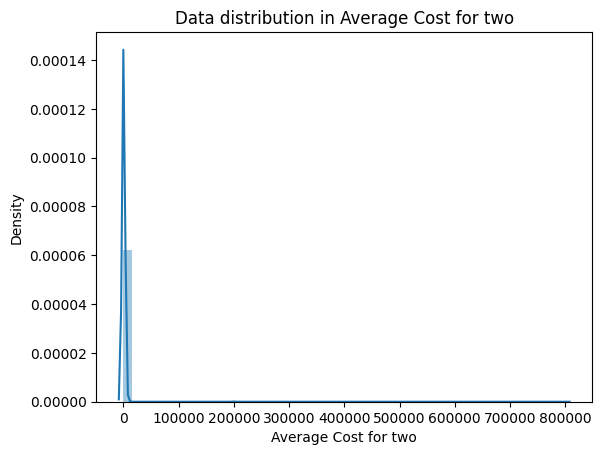

In [23]:
# Checking data distribution in Average Cost for two
sns.distplot(df['Average Cost for two'])
plt.title('Data distribution in Average Cost for two')
plt.show()

Data is right skewed in Average cost for two.

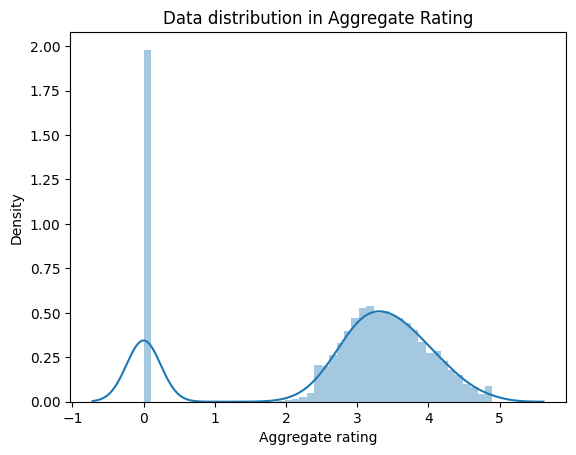

In [24]:
# Checking data distribution in Aggregate Rating
sns.distplot(df['Aggregate rating'])
plt.title('Data distribution in Aggregate Rating')
plt.show()

Most of the data points are on higher side of the graph.

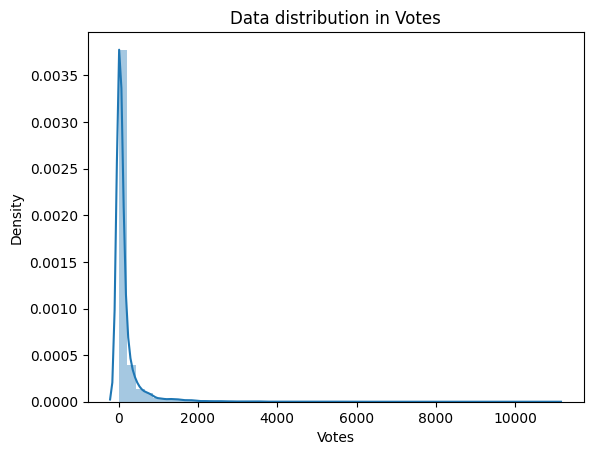

In [25]:
# Checking data distribution in Votes
sns.distplot(df['Votes'])
plt.title('Data distribution in Votes')
plt.show()

Votes are right skewed.

Price range
1    4139
2    2965
3    1356
4     570
Name: count, dtype: int64


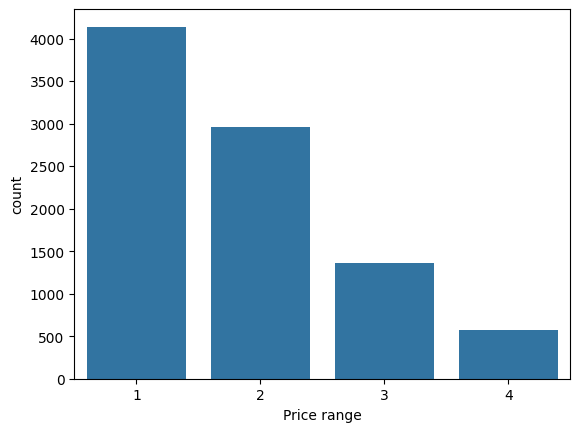

In [26]:
# Counting Price Class
print(df['Price range'].value_counts())
sns.countplot(x='Price range',data=df)
plt.show()

Price range 1 has highest count and range 4 has least. Since it is target variable for classification task we have class imbalance problem.

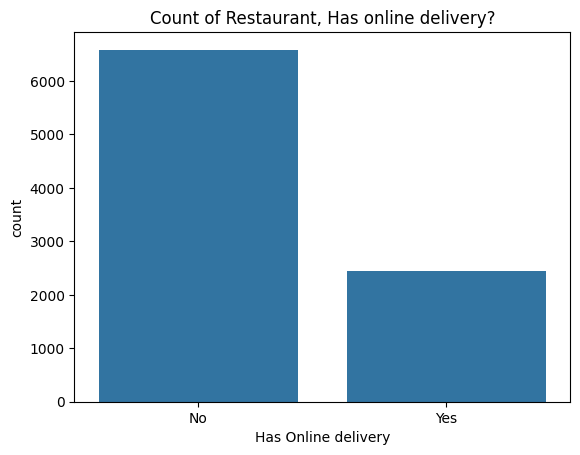

In [27]:
# Countplot for restaurant has online delivery
sns.countplot(x='Has Online delivery',data=df)
plt.title('Count of Restaurant, Has online delivery?')
plt.show()

Most restaurants does not have online delivery service.

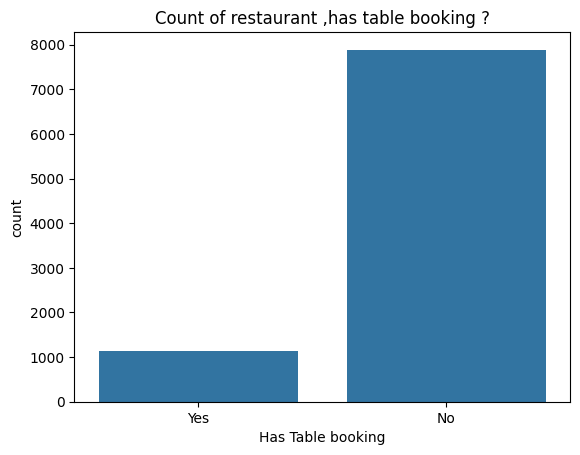

In [28]:
# Count of restaurant has table booking
sns.countplot(x='Has Table booking',data=df)
plt.title('Count of restaurant ,has table booking ?')
plt.show()

Most restaurant are not offering Table booking facility.

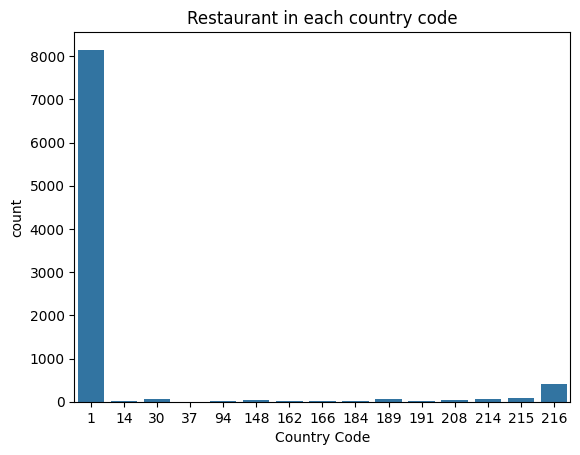

In [29]:
# Count of restaurent in each country code
sns.countplot(x='Country Code',data=df)
plt.title('Restaurant in each country code')
plt.show()

Most restaurant are in country code 1

Bivariate

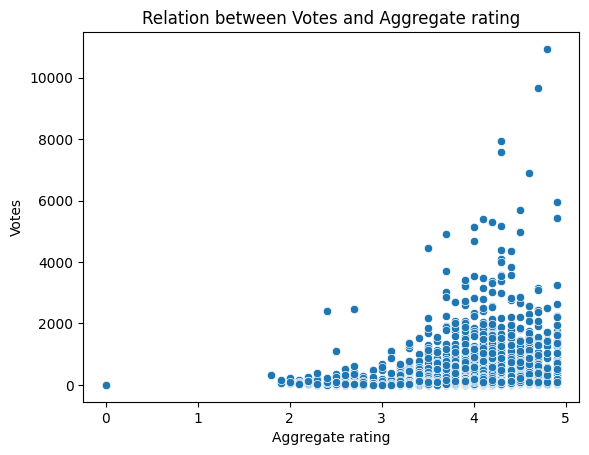

In [30]:
# Checking relation of votes with Aggregate rating
sns.scatterplot(x='Aggregate rating',y='Votes',data=df)
plt.title('Relation between Votes and Aggregate rating')
plt.show()

Votes has positive relation with aggregate rating which means if votes are increasing aggregate rating are also increasing

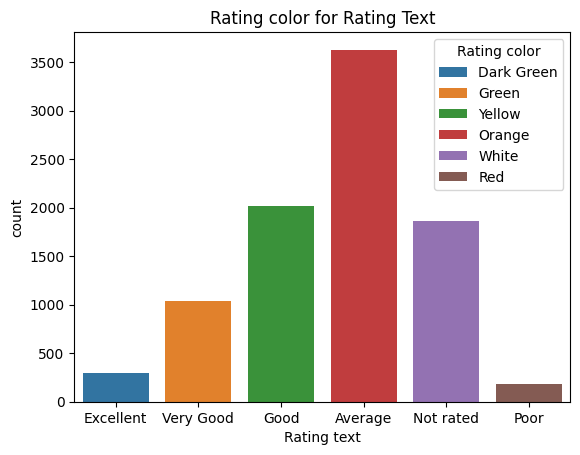

In [31]:
# checking rating color for rating text
sns.countplot(x='Rating text',data=df,hue='Rating color')
plt.title('Rating color for Rating Text')
plt.show()

1) Dark green rating color represents Excellent
2) Green Rating color represents Very good
3) yellow rating color represents Good
4) Orange Rating color represents Average
5) White Rating color represents Not rated
6) Red rating color represents poor. 

# Outliers

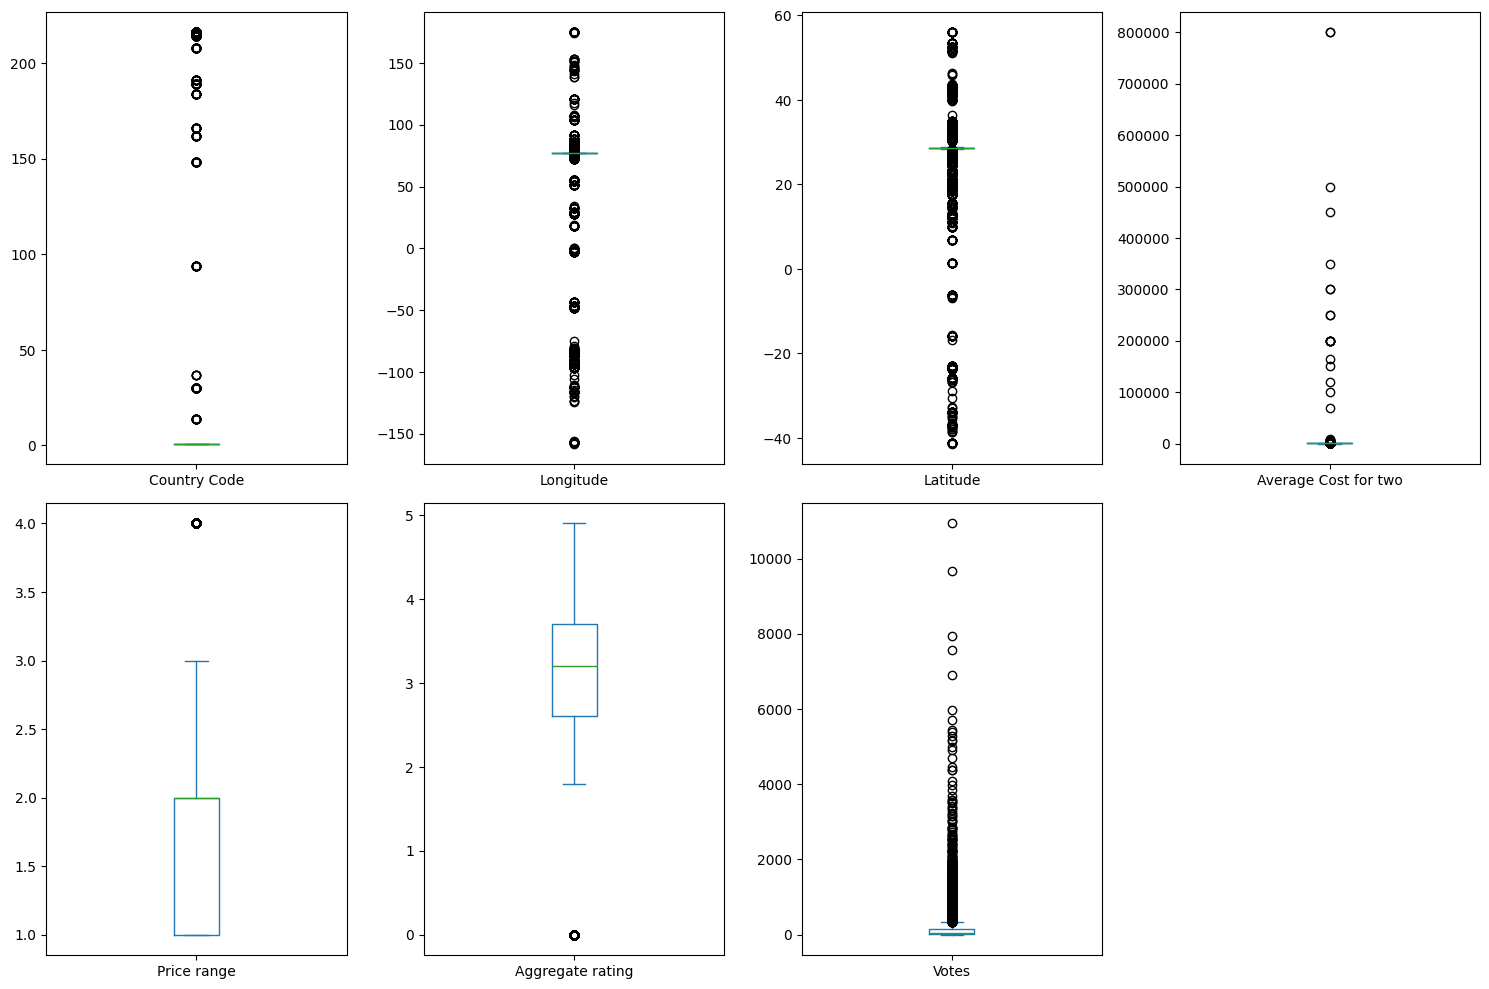

In [32]:
# Plotting box plot to check outliers
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(15,10))
plt.tight_layout()
plt.show()

Outliers are present in Country code, Longitude, Latitude, Average Cost for two and Votes. But Average cost for two is target variable in this task. Hence we are not going to remove outliers from this column.

In [40]:
# Importing Zscore
from scipy.stats import zscore

In [41]:
zr=np.abs(zscore(df[['Country Code','Longitude','Latitude','Aggregate rating','Votes']]))

In [42]:
# Threshold =3
print(np.where(zr>3))

(array([  22,   23,   24, ..., 9027, 9028, 9029], dtype=int64), array([2, 2, 2, ..., 0, 0, 0], dtype=int64))


In [43]:
# Removing outliers
dfnr=df[np.abs(zr<3).all(axis=1)]

In [44]:
# Data loss percentage due to outliers
round((df.shape[0]-dfnr.shape[0])/df.shape[0]*100,2)

10.43

10.43 % data lost due to ouliers.

# Encoding

In [45]:
# Creating encoding function
def Encoding(data):
    from sklearn.preprocessing import LabelEncoder
    for column in data.columns:
        if data[column].dtype=='object':
            data[column]=LabelEncoder().fit_transform(data[column])

In [46]:
dfnr.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [47]:
# Encoding Data
Encoding(dfnr)

In [48]:
dfnr.dtypes

Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two    float64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

# Correlation

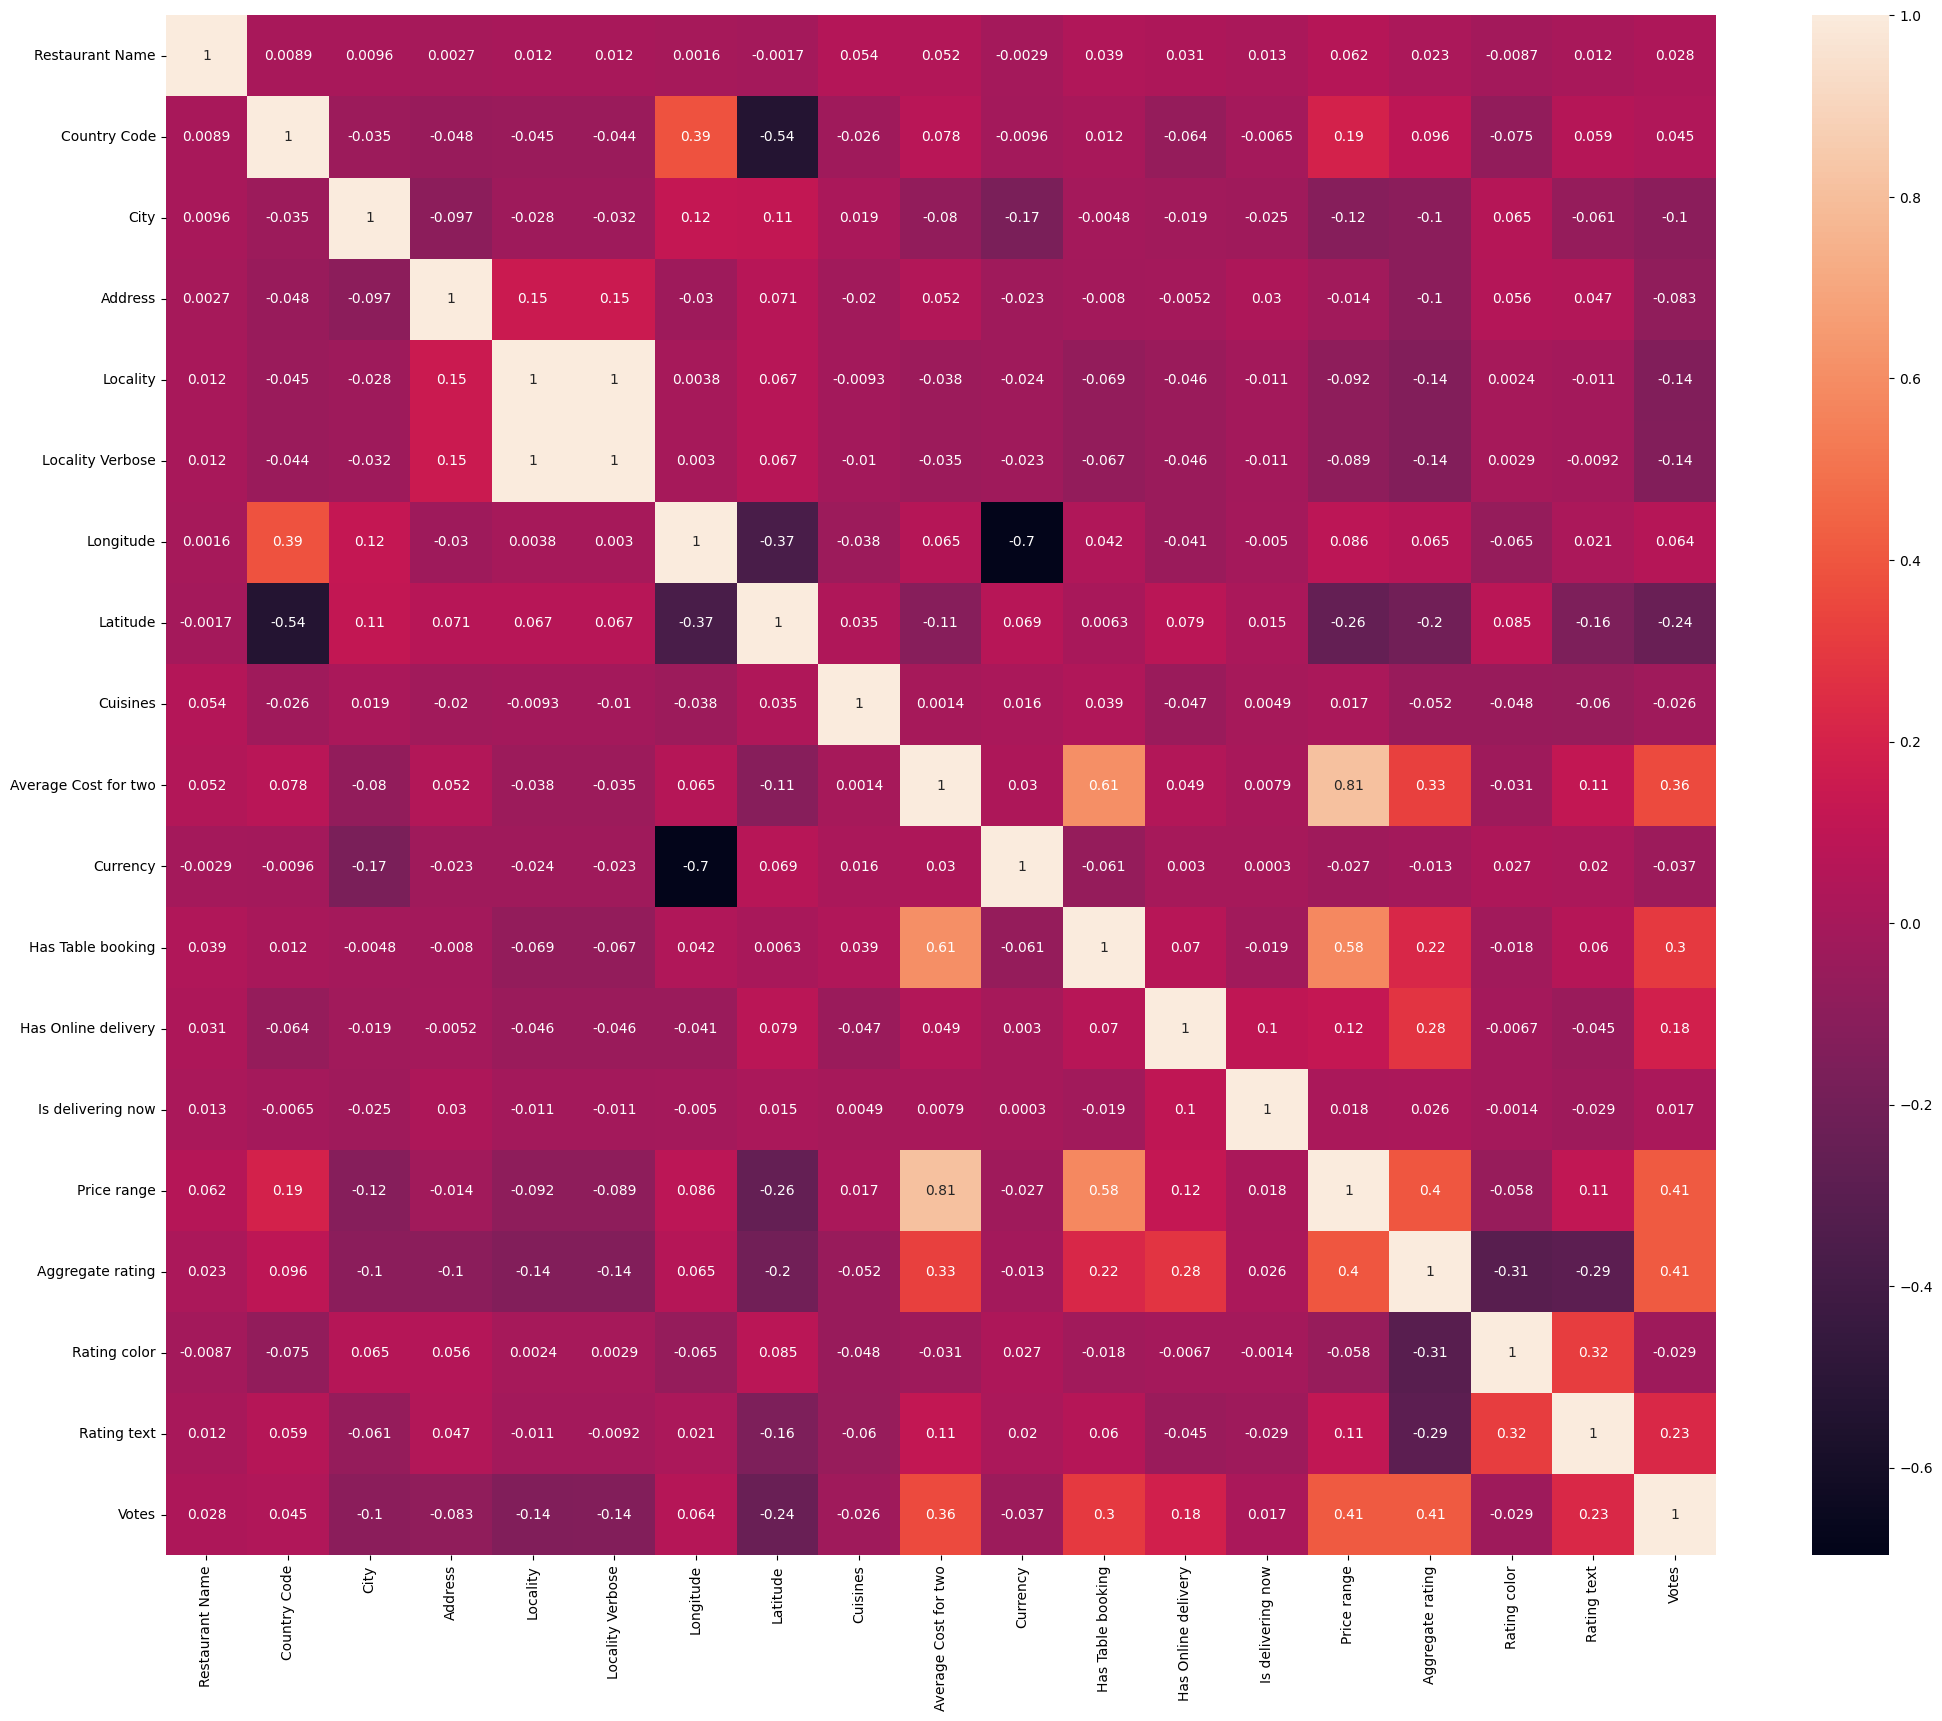

In [49]:
# Plotting heat map to visualize Correlation
plt.figure(figsize=(25,20))
sns.heatmap(dfnr.corr(),annot=True)
plt.show()

Price range has highest positive correlation with Average cost for two followed by 'Has table booking','Votes' and 'Aggregate rating'

In [73]:
# Dropping least correlated columns
dfnr.drop(columns={'Restaurant Name','Country Code','City','Locality Verbose','Address','Longitude','Latitude','Cuisines','Currency',
                 'Is delivering now','Rating color'},inplace=True)

In [74]:
dfnr.shape

(8088, 8)

# Skewness

In [75]:
# Checking Skewness
dfnr.skew()

Locality               -0.143832
Average Cost for two    3.639236
Has Table booking       2.199892
Has Online delivery     0.914894
Price range             1.006841
Aggregate rating       -0.973811
Rating text             0.492348
Votes                   3.632641
dtype: float64

In [76]:
# Importing Power Transformer
from sklearn.preprocessing import PowerTransformer

In [77]:
# Removing skewness using PowerTransformer
dfnr[['Aggregate rating','Votes']]=PowerTransformer().fit_transform(dfnr[['Aggregate rating','Votes']])

In [78]:
dfnr.skew()

Locality               -0.143832
Average Cost for two    3.639236
Has Table booking       2.199892
Has Online delivery     0.914894
Price range             1.006841
Aggregate rating       -0.641026
Rating text             0.492348
Votes                  -0.013613
dtype: float64

Splitting X and Y data

In [79]:
# Splitting input and Target variable
xr=dfnr.drop('Average Cost for two',axis=1)
yr=dfnr['Average Cost for two']

In [80]:
xr

,Locality,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,93,1,0,3,2.068929,1,1.383711
1,362,1,0,3,1.710436,1,1.739626
2,177,1,0,4,1.594430,5,1.299627
3,530,0,0,4,2.191899,1,1.467876
4,530,1,0,4,2.068929,1,1.208295
...,...,...,...,...,...,...,...
9512,335,0,0,4,1.148014,5,1.122392
9513,335,0,0,3,1.367688,5,1.331650
9514,441,0,0,4,2.191899,1,1.141731
9515,505,0,0,3,1.256965,5,0.464413


# Scaling

In [81]:
# Creating Scaling function
def Scaling(data):
    from sklearn.preprocessing import StandardScaler
    data=pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
    return data

In [82]:
# Scaling input data
xr=Scaling(xr)

In [83]:
xr

,Locality,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,-1.591870,2.586158,-0.642265,1.484712,2.068929,-0.370795,1.383711
1,-0.276851,2.586158,-0.642265,1.484712,1.710436,-0.370795,1.739626
2,-1.181232,2.586158,-0.642265,2.650797,1.594430,2.099032,1.299627
3,0.544424,-0.386674,-0.642265,2.650797,2.191899,-0.370795,1.467876
4,0.544424,2.586158,-0.642265,2.650797,2.068929,-0.370795,1.208295
...,...,...,...,...,...,...,...
8083,-0.408842,-0.386674,-0.642265,2.650797,1.148014,2.099032,1.122392
8084,-0.408842,-0.386674,-0.642265,1.484712,1.367688,2.099032,1.331650
8085,0.109344,-0.386674,-0.642265,2.650797,2.191899,-0.370795,1.141731
8086,0.422211,-0.386674,-0.642265,1.484712,1.256965,2.099032,0.464413


# Multicolinearity

In [84]:
# Creating VIf function
def vif(data):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif

In [85]:
# Checking VIF score
vif(xr)

,Columns,VIF
0,Locality,1.030779
1,Has Table booking,1.521340
2,Has Online delivery,1.163409
3,Price range,1.899057
4,Aggregate rating,4.030830
5,Rating text,1.134929
6,Votes,4.549487


No Multicolinearity present in the dataset.

# Random state

In [86]:
# Creating Random state class for regression and classification task
class random_state:
    
    def __init__(self,model,x,y):
        self.model=model
        self.x=x
        self.y=y
        
    def regressor(self):
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import r2_score
        r2s=0
        rs=0
        for i in range(1,300):
            x_train,x_test,y_train,y_test=train_test_split(self.x,self.y,test_size=0.30,random_state=i)
            self.model.fit(x_train,y_train)
            r2sc=r2_score(y_test,self.model.predict(x_test))
            if r2sc>r2s:
                r2s=r2sc
                rs=i
        print('Best r2score {} at random_state {}.'.format(round(r2s*100,2),rs))
        
    def classification(self):
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score
        rs=0
        acc=0
        for i in range(1,300):
            x_train,x_test,y_train,y_test=train_test_split(self.x,self.y,test_size=0.30,random_state=i)
            self.model.fit(x_train,y_train)
            accu=accuracy_score(y_test,self.model.predict(x_test))
            if accu>acc:
                acc=accu
                rs=i
        print('Best accuracy score {} at random_state {}.'.format(round(acc*100,2),rs))

In [87]:
# Importing Regression model
from sklearn.linear_model import LinearRegression

In [88]:
# searching best random state
random_state(LinearRegression(),xr,yr).regressor()

Best r2score 75.24 at random_state 43.


In [89]:
# Importing ML libraries
from sklearn.model_selection import train_test_split, cross_val_score

In [90]:
# Splitting Train test data
xtrainR,xtestR,ytrainR,ytestR=train_test_split(xr,yr,test_size=0.30,random_state=43)
print(xtrainR.shape)
print(xtestR.shape)
print(ytrainR.shape)
print(ytestR.shape)

(5661, 7)
(2427, 7)
(5661,)
(2427,)


In [91]:
# Importing Regression Models and metrics
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [92]:
# Creating model variables
LR=LinearRegression()
LS=Lasso()
RD=Ridge()
SVR=SVR()
DTR=DecisionTreeRegressor()
ETR=ExtraTreesRegressor()
ABR=AdaBoostRegressor()
GBR=GradientBoostingRegressor()
RFR=RandomForestRegressor()
KNR=KNeighborsRegressor()

In [93]:
# Creating List
modelsR=[LR,
       LS,
       RD,
       SVR,
       DTR,
       ETR,
       ABR,
       GBR,
       RFR,
       KNR]

In [94]:
# Checking models performance
for modelR in modelsR:
    modelR.fit(xtrainR,ytrainR)
    predR=modelR.predict(xtestR)
    r2s=r2_score(ytestR,predR)
    print(modelR)
    print('R2Score',round(r2s*100,2))
    print('MAE',mean_absolute_error(ytestR,predR))
    print('MSE',mean_squared_error(ytestR,predR))
    print('CROSSVALSCORE')
    cvscR=cross_val_score(modelR,xr,yr)
    print(cvscR)
    print(round(cvscR.mean()*100,2))
    print('Difference betwen CVSCR mean and R2score for model {} :-'.format(modelR),round(r2s*100-cvscR.mean()*100,2))
    print("*"*100)
    print('\n')

LinearRegression()
R2Score 75.24
MAE 168.60834959343524
MSE 77245.74824514934
CROSSVALSCORE
[0.67300369 0.73892161 0.75156574 0.66788871 0.58247117]
68.28
Difference betwen CVSCR mean and R2score for model LinearRegression() :- 6.96
****************************************************************************************************


Lasso()
R2Score 75.28
MAE 168.14741459345984
MSE 77107.01017375934
CROSSVALSCORE
[0.67462623 0.73993854 0.75202889 0.66677102 0.58275257]
68.32
Difference betwen CVSCR mean and R2score for model Lasso() :- 6.96
****************************************************************************************************


Ridge()
R2Score 75.24
MAE 168.5828929593902
MSE 77242.67914189864
CROSSVALSCORE
[0.67305267 0.73892746 0.75157738 0.66785338 0.58250102]
68.28
Difference betwen CVSCR mean and R2score for model Ridge() :- 6.96
****************************************************************************************************


SVR()
R2Score 36.96
MAE 210.449173299

GradientBoostingRegressor is Giving Highest r2_score of 82.13. But ExtraTreesRegressor has r2_score of 75.55 and least differnce between r2score and cv score. Hence considering ExtraTreesRegressor as best performing model.

In [131]:
# best performing model
ETR

ExtraTreesRegressor()

# Hyperparameter Tunning

In [132]:
# Importing grisearch cv
from sklearn.model_selection import GridSearchCV

In [163]:
# Parameters
parameters={'n_estimators':[100,150,200],
           'criterion':['squared_error','absolute_error'],
           'max_features':['sqrt','log2',None]}

In [164]:
# Sending model and parameters to tune
gscvR=GridSearchCV(ETR,parameters)

In [165]:
# Searching parameters
gscvR.fit(xtrainR,ytrainR)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200]})

In [166]:
# best params
gscvR.best_params_

{'criterion': 'absolute_error', 'max_features': None, 'n_estimators': 200}

In [168]:
ModelETR=ExtraTreesRegressor(criterion='absolute_error',max_features=None,n_estimators=200)

In [169]:
# Training model
ModelETR.fit(xtrainR,ytrainR)

ExtraTreesRegressor(criterion='absolute_error', max_features=None,
                    n_estimators=200)

In [170]:
predModel=ETR.predict(xtestR)

In [172]:
# r2 score
round(r2_score(ytestR,predModel)*100,2)

75.55

It's giving same r2 score as model with default parameters.

# Saving Model

In [173]:
# importing pickle
import pickle

In [174]:
# filename
filename='Averagecost4_2.pkl'

In [176]:
# Saving best model
pickle.dump(ModelETR,open(filename,'wb'))

# Classification 
Price Range

In [95]:
# shape of data
df.shape

(9030, 19)

In [96]:
# top 5 rows of data
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500.0,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500.0,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


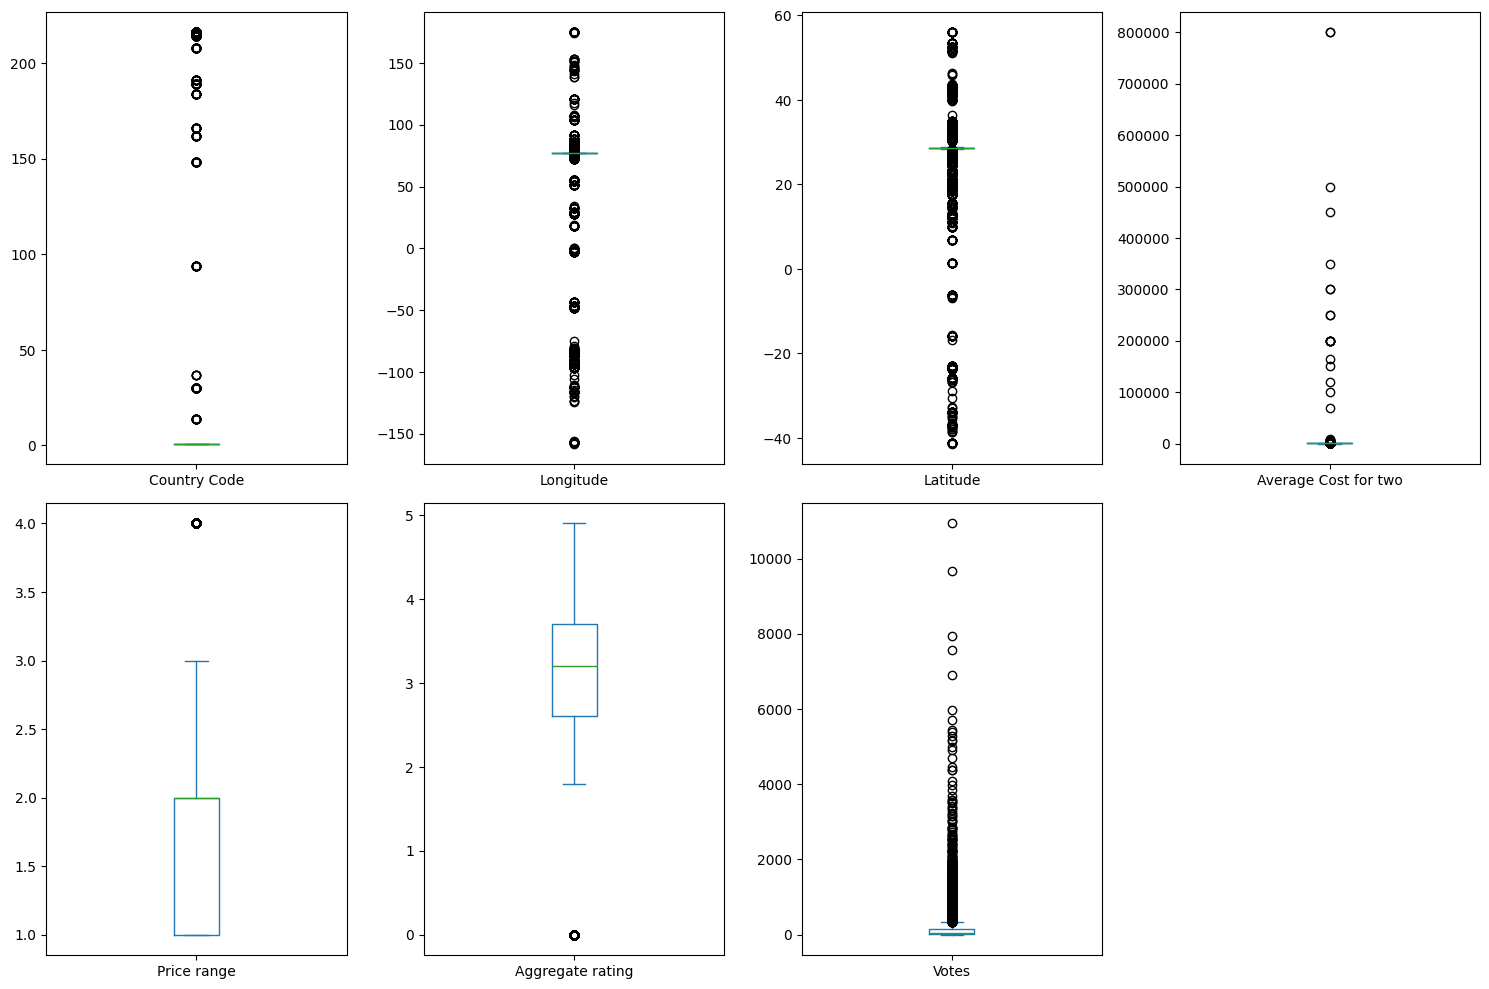

In [97]:
# Plotting box plot to check outliers
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(15,10))
plt.tight_layout()
plt.show()

Outliers are present in Country Code, Longitude, Latitude, Average cost for two and Votes.

In [98]:
# Zscore
zc=np.abs(zscore(df[['Country Code','Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']]))

In [99]:
# threshold = 3
print(np.where(zc>3))

(array([  22,   23,   24, ..., 9027, 9028, 9029], dtype=int64), array([2, 2, 2, ..., 0, 0, 0], dtype=int64))


In [100]:
# Removing outliers
dfnc=df[np.abs(zc<3).all(axis=1)]

In [101]:
# data loss percentage due to outliers
round((df.shape[0]-dfnc.shape[0])/df.shape[0]*100,2)

10.43

10.43 % data lost due to outliers.

Encoding

In [102]:
dfnc.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [103]:
# Encoding data
Encoding(dfnc)

In [104]:
dfnc.dtypes

Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two    float64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

Correlation

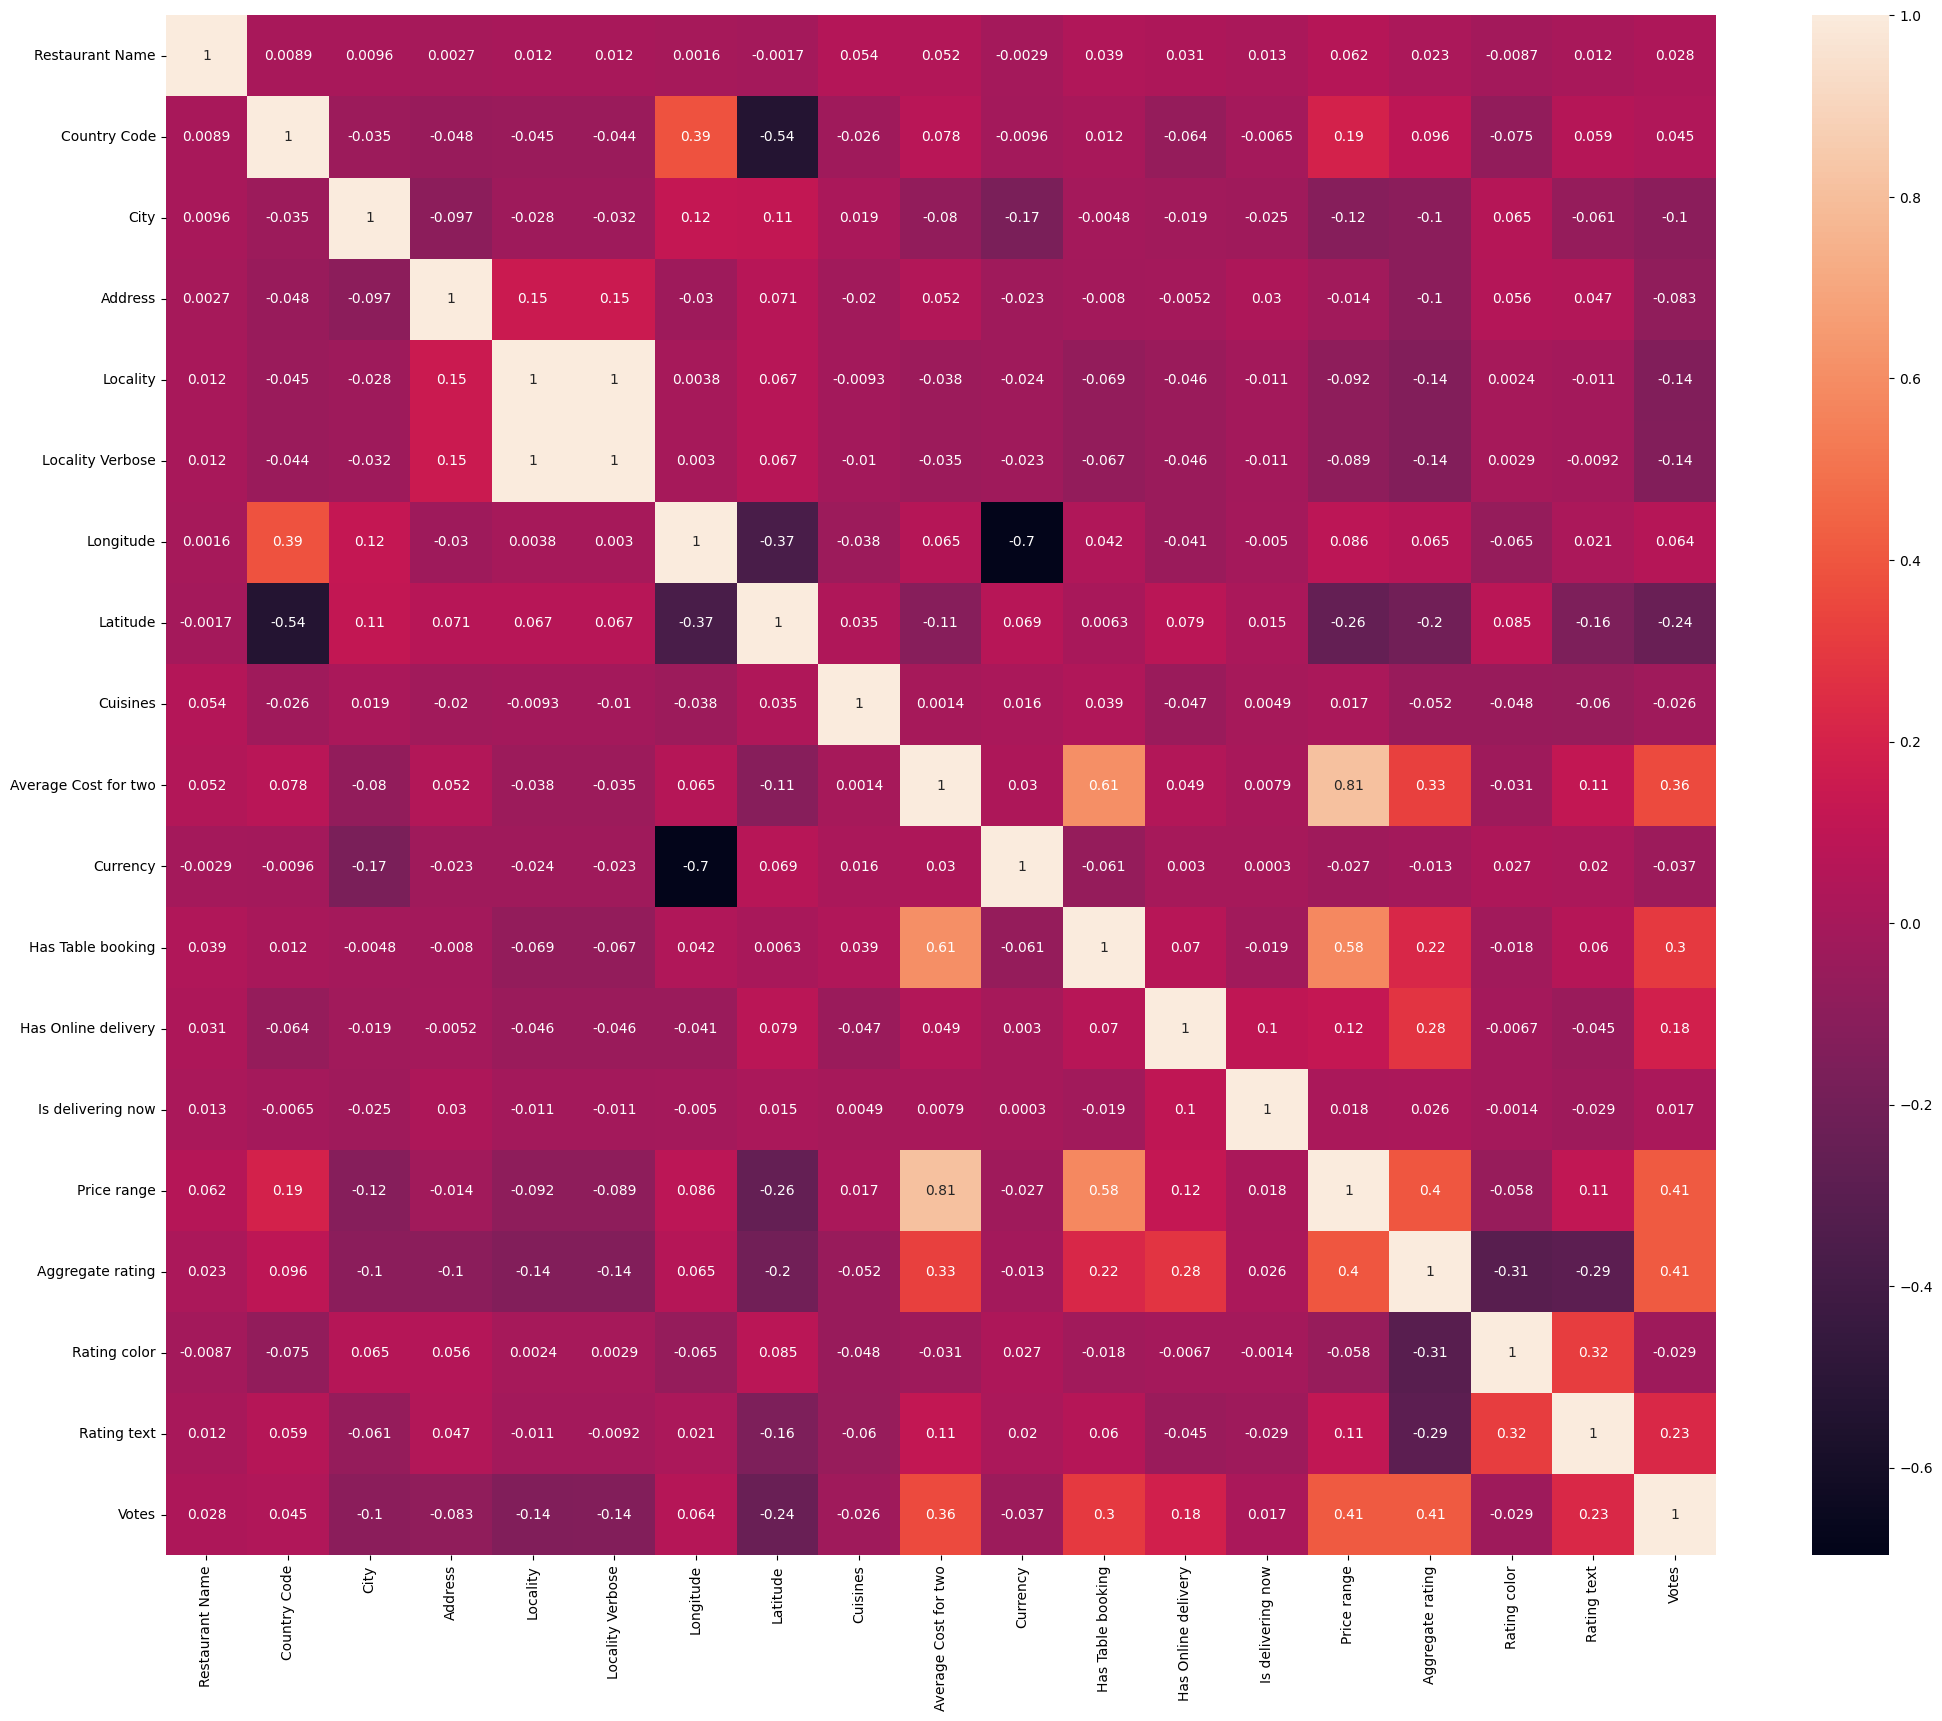

In [105]:
# Plotting heatmap to visualize correlation
plt.figure(figsize=(25,20))
sns.heatmap(dfnc.corr(),annot=True)
plt.show()

Average Cost for two has highest positive correlation with Price range followed by has table booking , votes and Aggregate rating

In [106]:
# Dropping least related columns
dfnc.drop(columns={'Restaurant Name','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency','Is delivering now','Rating color','Rating text'},inplace=True)

In [107]:
dfnc.shape

(8088, 8)

Skewness

In [108]:
# Checking skewness
dfnc.skew()

Country Code            9.916723
City                   -1.426562
Average Cost for two    3.639236
Has Table booking       2.199892
Has Online delivery     0.914894
Price range             1.006841
Aggregate rating       -0.973811
Votes                   3.632641
dtype: float64

In [109]:
# Removing skewness using power transformer
dfnc[['Average Cost for two','Aggregate rating','Votes']]=PowerTransformer().fit_transform(dfnc[['Average Cost for two','Aggregate rating','Votes']])

In [110]:
dfnc.skew()

Country Code            9.916723
City                   -1.426562
Average Cost for two   -0.006689
Has Table booking       2.199892
Has Online delivery     0.914894
Price range             1.006841
Aggregate rating       -0.641026
Votes                  -0.013613
dtype: float64

Splittin X and Y data

In [111]:
# Splitting input and target variable
xc=dfnc.drop('Price range',axis=1)
yc=dfnc['Price range']

Scaling

In [112]:
# Input data
xc

,Country Code,City,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating,Votes
0,162,27,1.150063,1,0,2.068929,1.383711
1,162,27,1.259316,1,0,1.710436,1.739626
2,162,28,2.704162,1,0,1.594430,1.299627
3,162,28,1.536461,0,0,2.191899,1.467876
4,162,28,1.536461,1,0,2.068929,1.208295
...,...,...,...,...,...,...,...
9512,191,11,2.839008,0,0,1.148014,1.122392
9513,191,11,2.370031,0,0,1.367688,1.331650
9514,191,11,2.704162,0,0,2.191899,1.141731
9515,191,11,1.887388,0,0,1.256965,0.464413


In [113]:
# Scaling input data
xc=Scaling(xc)
xc

,Country Code,City,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating,Votes
0,9.158029,-0.503184,1.150063,2.586158,-0.642265,2.068929,1.383711
1,9.158029,-0.503184,1.259316,2.586158,-0.642265,1.710436,1.739626
2,9.158029,-0.385062,2.704162,2.586158,-0.642265,1.594430,1.299627
3,9.158029,-0.385062,1.536461,-0.386674,-0.642265,2.191899,1.467876
4,9.158029,-0.385062,1.536461,2.586158,-0.642265,2.068929,1.208295
...,...,...,...,...,...,...,...
8083,10.825684,-2.393124,2.839008,-0.386674,-0.642265,1.148014,1.122392
8084,10.825684,-2.393124,2.370031,-0.386674,-0.642265,1.367688,1.331650
8085,10.825684,-2.393124,2.704162,-0.386674,-0.642265,2.191899,1.141731
8086,10.825684,-2.393124,1.887388,-0.386674,-0.642265,1.256965,0.464413


VIF

In [114]:
# Checking vif score
vif(xc)

,Columns,VIF
0,Country Code,1.027413
1,City,1.026152
2,Average Cost for two,1.840530
3,Has Table booking,1.475486
4,Has Online delivery,1.169871
5,Aggregate rating,3.670155
6,Votes,4.333356


No multicolinearity present in dataset.

# Class Imbalance

In [118]:
# Price range value count percentage 
print(round(yc.value_counts()/yc.shape[0]*100,2).astype('str')+' %')

Price range
1    49.42 %
2    33.23 %
3     12.6 %
4     4.75 %
Name: count, dtype: object


In [119]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [120]:
# Balancing class
xc1,yc1=SMOTE().fit_resample(xc,yc)

In [122]:
print(round(yc1.value_counts()/yc1.shape[0]*100,2).astype('str')+' %')

Price range
3    25.0 %
4    25.0 %
2    25.0 %
1    25.0 %
Name: count, dtype: object


Random State

In [123]:
# importing classification model
from sklearn.ensemble import RandomForestClassifier

In [124]:
# Finding best random state
random_state(RandomForestClassifier(),xc1,yc1).classification()

Best accuracy score 99.56 at random_state 183.


In [125]:
# Splitting training testing data
xtrainC,xtestC,ytrainC,ytestC=train_test_split(xc1,yc1,test_size=0.30,random_state=183)
print(xtrainC.shape)
print(xtestC.shape)
print(ytrainC.shape)
print(ytestC.shape)

(11191, 7)
(4797, 7)
(11191,)
(4797,)


Model

In [152]:
# Importing Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [127]:
# Importing Classification metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [128]:
# Creating Variables for models
DTC=DecisionTreeClassifier()
KNC=KNeighborsClassifier()
SVC=SVC()
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()
BGC=BaggingClassifier()

In [129]:
# creating list with classification models
modelsC=[DTC,KNC,SVC,RFC,ABC,GBC,ETC,BGC]

In [130]:
# Checking models performance
for modelC in modelsC:
    modelC.fit(xtrainC,ytrainC)
    predC=modelC.predict(xtestC)
    accuracy=accuracy_score(ytestC,predC)
    print(modelC)
    print('Accuracy_score',accuracy)
    print(confusion_matrix(ytestC,predC))
    print(classification_report(ytestC,predC))
    print('CrossValScore')
    cvscC=cross_val_score(modelC,xc1,yc1)
    print(cvscC)
    print(cvscC.mean())
    print("difference between accuracy score and cv mean score for {} is".format(modelC),round(accuracy*100-cvscC.mean()*100,2))
    print('*'*100)
    print('\n')

DecisionTreeClassifier()
Accuracy_score 0.9883260371065249
[[1190    3    0    0]
 [   0 1202   15    1]
 [   0    5 1179   16]
 [   0    1   15 1170]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1193
           2       0.99      0.99      0.99      1218
           3       0.98      0.98      0.98      1200
           4       0.99      0.99      0.99      1186

    accuracy                           0.99      4797
   macro avg       0.99      0.99      0.99      4797
weighted avg       0.99      0.99      0.99      4797

CrossValScore
[0.8011257  0.99530957 0.9931207  0.98029403 0.99030341]
0.9520306815156407
difference between accuracy score and cv mean score for DecisionTreeClassifier() is 3.63
****************************************************************************************************


KNeighborsClassifier()
Accuracy_score 0.9685219929122368
[[1149   44    0    0]
 [   1 1160   56    1]
 [   0    9 1162   29]
 [   

ExtraTreesClassifier is giving highest accuracy_score of 99% But SVC has least difference of 1.17 between accuracy score and cv score amongst all the model giving accuracy score of more than 90 %. So selecting SVC is the best performing model.

In [144]:
# Best performing model
SVC

SVC()

In [150]:
round(accuracy_score(ytestC,SVC.predict(xtestC))*100,2)

94.96

Hyperparameter tunning

In [145]:
# Parameters to tune
ParametersC={'kernel':['linear','poly','rbf','sigmoid'],
            'gamma':['scale','auto'],
            'decision_function_shape':['ovo','ovr']}

In [146]:
# Sending model and Parameters for tunning
gscvC=GridSearchCV(SVC,ParametersC)

In [147]:
# Finding best model
gscvC.fit(xtrainC,ytrainC)

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [148]:
# Best params
gscvC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [153]:
ModelSVC=SVC(decision_function_shape='ovo',gamma='auto',kernel='rbf')

In [154]:
ModelSVC.fit(xtrainC,ytrainC)

SVC(decision_function_shape='ovo', gamma='auto')

In [158]:
PredModel=ModelSVC.predict(xtestC)

In [159]:
round(accuracy_score(ytestC,PredModel)*100,2)

95.64

Model with tunned parameter giving slight higher accuracy than model with default parameter. So going to save model with tunned parameter.

# Saving best model

In [160]:
# Importing pickle
import pickle

In [161]:
filename='price_range.pkl'

In [162]:
# saving best model
pickle.dump(ModelSVC,open(filename,'wb'))